In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from ipywidgets import interact, FloatSlider
from IPython.display import display
from scipy.interpolate import interp1d

# Equation Thermique de la résistance

## Equation de la Température 
$$C \, d\dfrac{T(t)}{dt} = P_{app}(t) - P_{pertes}$$
$$P_{pertes} = h.A.(T(t) - T_{amb})$$
$$\Longrightarrow C \, d\dfrac{T(t)}{dt} = P_{app}(t) - h.A.(T(t) - T_{amb})$$

## Conversion de la RESISTANCE DU CAPTEUR EN TEMPERATURE 

In [4]:


# Données : Température (°C) et Ratio (RT / R25)
temperature = np.array([-55.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 
                        5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 
                        75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 
                        140.0, 145.0, 150.0, 155.0])

resistance_ratio = np.array([103.81, 73.707, 52.723, 37.988, 27.565, 20.142, 14.801, 10.976, 8.1744, 6.1407, 
                             4.6331, 3.5243, 2.6995, 2.0831, 1.6189, 1.2666, 1.0, 0.78351, 0.62372, 0.49937, 
                             0.40218, 0.32557, 0.26402, 0.21527, 0.17693, 0.14616, 0.12097, 0.10053, 0.083761, 
                             0.070039, 0.058937, 0.049777, 0.042146, 0.035803, 0.030504, 0.026067, 0.022332, 
                             0.019186, 0.016515, 0.014253, 0.012367, 0.010758, 0.0093933])

# Créer une fonction d'interpolation
interp_func = interp1d(resistance_ratio, temperature, kind='linear', fill_value="extrapolate")

# Fonction pour convertir une résistance mesurée en température
def resistance_to_temperature(R_measured):
    R25 = 47e3  # Résistance à 25°C en Ohms
    RT_ratio = R_measured / R25  # Calculer le ratio RT / R25
    T = interp_func(RT_ratio)  # Interpoler la température correspondante
    return T

# Exemple : Convertir une résistance mesurée en température
R_measured = 37e3  # Exemple : résistance mesurée en Ohms
temperature_result = resistance_to_temperature(R_measured)
print(f"Résistance mesurée : {R_measured} Ohms => Température : {temperature_result:.2f} °C")


Résistance mesurée : 37000.0 Ohms => Température : 29.91 °C


## la Résistance de la plaque chauffante en fonction de la Température


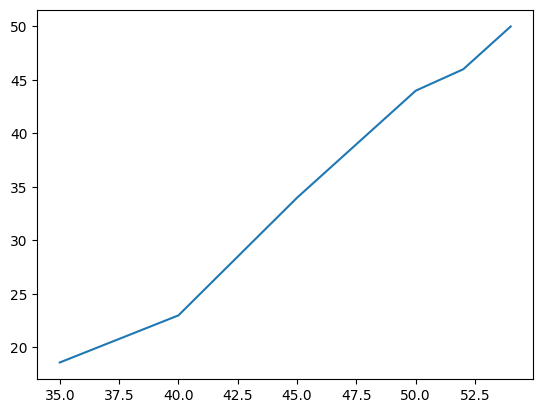

In [2]:
T_i = [35,40,45,50,51,52,54]
R_i = [18.6,23,34,44,45,46,50]
if len(T_i) == len(R_i):
    plt.plot(T_i, R_i)

## On applique une regression linéaire pour avoir la résistance en fonction de la température

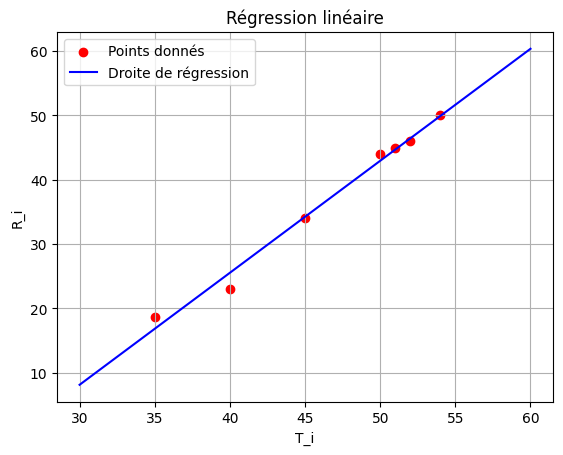

In [3]:



T_i = np.array(T_i).reshape(-1, 1)
R_i = np.array(R_i)

model = LinearRegression()
model.fit(T_i, R_i)

T_range = np.linspace(30, 60, 100).reshape(-1, 1)
R_pred = model.predict(T_range)


plt.scatter(T_i, R_i, color='red', label='Points donnés')
plt.plot(T_range, R_pred, color='blue', label='Droite de régression')


plt.title('Régression linéaire')
plt.xlabel('T_i')
plt.ylabel('R_i')
plt.legend()


plt.grid(True)
plt.show()

## la Température de la plaque chauffante en fonction de la Puissance 

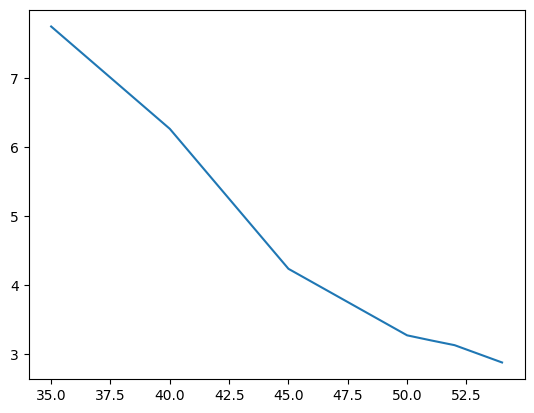

In [4]:
U=12
T_i = [35,40,45,50,51,52,54]
R_i = [(U**2)/18.6,(U**2)/23,(U**2)/34,(U**2)/44,(U**2)/45,(U**2)/46,(U**2)/50]
if len(T_i) == len(R_i):
    plt.plot(T_i, R_i)

## Mésure du Refroidissement de la Résistance en fonction du temps

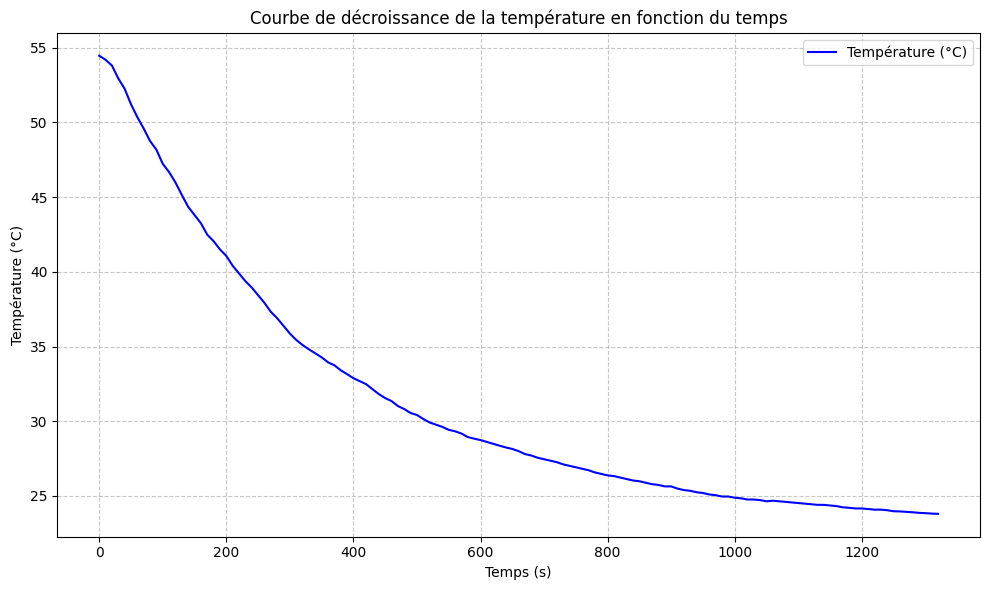

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Données du temps (s) et de la température (°C)
temps = np.array([
    0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
    210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
    410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600,
    610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800,
    810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000,
    1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170,
    1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320
])

temperatures = np.array([
    54.45890731, 54.18582021, 53.80557236, 52.94137269, 52.25001296, 51.21297337, 50.3487737, 49.58589651, 48.75271824,
    48.16949346, 47.22522475, 46.66977257, 45.97545735, 45.14227908, 44.34594006, 43.79864621, 43.25135236, 42.48514097,
    42.04730589, 41.50001204, 41.06217696, 40.40542434, 39.88911703, 39.37580953, 38.94805328, 38.43474578, 37.92143829,
    37.32257954, 36.89482329, 36.3815158, 35.8682083, 35.44045205, 35.09824705, 34.81014976, 34.54384278, 34.27753581,
    33.94465209, 33.74492186, 33.41203814, 33.15238884, 32.87942419, 32.67969396, 32.47996373, 32.14708001, 31.81419629,
    31.54788932, 31.34815909, 31.01527537, 30.81554514, 30.54923816, 30.41608467, 30.1497777, 29.91399043, 29.76657071,
    29.619151, 29.42259138, 29.32431157, 29.17689186, 28.94102032, 28.83291253, 28.73954671, 28.61178296, 28.4889332,
    28.36116945, 28.24323368, 28.14495387, 27.99753416, 27.80097454, 27.70269473, 27.55527502, 27.45699521, 27.3587154,
    27.2604356, 27.11301588, 27.01473607, 26.91645627, 26.81817646, 26.71989665, 26.57247694, 26.47419713, 26.37591732,
    26.32677741, 26.22849761, 26.1302178, 26.03193799, 25.98279809, 25.88451828, 25.78623847, 25.73709856, 25.63881876,
    25.6389, 25.49139904, 25.39311923, 25.34397933, 25.24569952, 25.19655962, 25.09827981, 25.0491399, 24.96009641,
    24.96009641, 24.88028922, 24.84038563, 24.76057844, 24.76057844, 24.72067485, 24.64086766, 24.68077126, 24.64086766,
    24.60096407, 24.56106048, 24.52115688, 24.48125329, 24.4413497, 24.40543647, 24.40144611, 24.36154251, 24.32163892,
    24.24183173, 24.2059185, 24.16202455, 24.16202455, 24.12212096, 24.08221736, 24.08221736, 24.04231377, 23.97447766,
    23.96250658, 23.93457407, 23.90664155, 23.86673796, 23.84678616, 23.81885365, 23.80289221
])

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(temps, temperatures, label='Température (°C)', color='blue')
plt.title("Courbe de décroissance de la température en fonction du temps")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Affichage du graphique
plt.show()

## Calcule de la constante du temps $\tau$ = 330.17

In [6]:
# Définition du modèle exponentiel
def modele_exponentiel(t, T_inf, T0, tau):
    return T_inf + (T0 - T_inf) * np.exp(-t / tau)

# Estimation des paramètres (T_inf, T0, tau)
popt, _ = curve_fit(modele_exponentiel, temps, temperatures, p0=[23, 54, 500])

# Extraction de la constante de temps tau
T_inf_estime, T0_estime, tau_estime = popt

tau = tau_estime

tau

np.float64(330.1717276356472)

## Simulation de la l'évolution de la température pendant la décharge thermique

--- Informations sur la Décharge Thermique ---
Température initiale : 54 °C
Température ambiante : 22.8 °C
Température finale atteinte (approx) : 22.87 °C
Constante de temps τ (observée) : 330.10 s
Temps pour atteindre 25% de la décharge : 95.00 s (Température : 46.20 °C)
Temps pour atteindre 50% de la décharge : 228.90 s (Température : 38.40 °C)
Temps pour atteindre 63.2% de la décharge : 330.10 s (Température : 34.28 °C)
Temps pour atteindre 90% de la décharge : 760.20 s (Température : 25.92 °C)
Temps pour atteindre 99% de la décharge : 1520.30 s (Température : 23.11 °C)


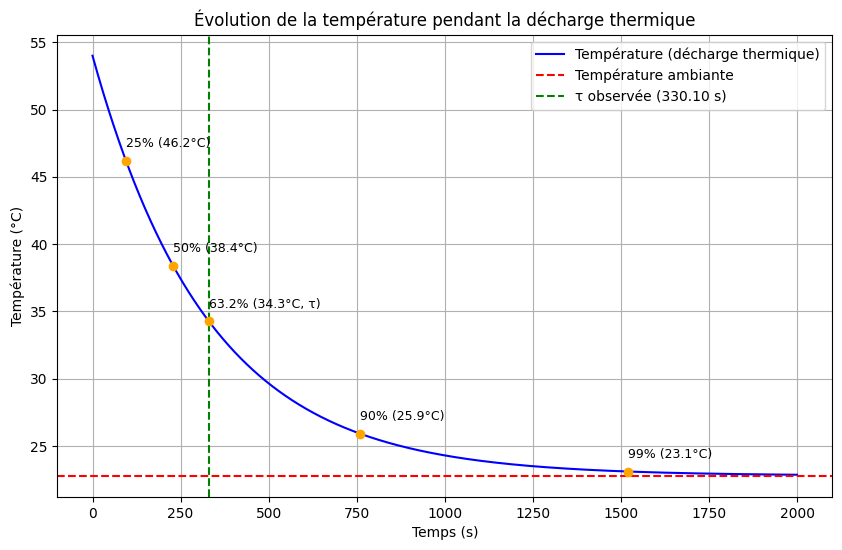

In [8]:
# Constantes du problème
tau = 330.1717276356472  # Constante de temps en secondes
alpha = 0.0944931164     # Coefficient de dissipation thermique en W/K
C = tau * alpha          # Capacité thermique en J/K
Tamb = 22.8                # Température ambiante en °C

# Méthode d'Euler pour la décharge thermique
def euler_decharge(T0, t_final, dt):
    t_values = np.arange(0, t_final, dt)  # Temps discrétisé
    T_values = np.zeros_like(t_values)    # Températures discrétisées
    T_values[0] = T0  # Température initiale

    # Boucle de simulation
    for n in range(1, len(t_values)):
        T = T_values[n - 1]
        # Équation d'évolution lors de la décharge thermique
        T_values[n] = T - dt * alpha * (T - Tamb) / C

    return t_values, T_values


# Paramètres de simulation
T0 = 54    # Température initiale en °C (température atteinte après chauffage)
t_final = 2000  # Temps final de la simulation en secondes
dt = 0.1    # Pas de temps en secondes

# Résolution de l'équation de décharge
t_values, T_values = euler_decharge(T0, t_final, dt)

# Calcul des températures instantanées à différents pourcentages
temp_25 = Tamb + (T0 - Tamb) * 0.75
temp_50 = Tamb + (T0 - Tamb) * 0.50
temp_632 = Tamb + (T0 - Tamb) * 0.368  # Correspond à 63.2% de la décharge complète
temp_90 = Tamb + (T0 - Tamb) * 0.10
temp_99 = Tamb + (T0 - Tamb) * 0.01

# Récupération des instants correspondants
t_25 = t_values[np.where(T_values <= temp_25)[0][0]]
t_50 = t_values[np.where(T_values <= temp_50)[0][0]]
t_632 = t_values[np.where(T_values <= temp_632)[0][0]]
t_90 = t_values[np.where(T_values <= temp_90)[0][0]]
t_99 = t_values[np.where(T_values <= temp_99)[0][0]]

# Informations sur la décharge thermique
print(f"--- Informations sur la Décharge Thermique ---")
print(f"Température initiale : {T0} °C")
print(f"Température ambiante : {Tamb} °C")
print(f"Température finale atteinte (approx) : {T_values[-1]:.2f} °C")
print(f"Constante de temps τ (observée) : {t_632:.2f} s")
print(f"Temps pour atteindre 25% de la décharge : {t_25:.2f} s (Température : {temp_25:.2f} °C)")
print(f"Temps pour atteindre 50% de la décharge : {t_50:.2f} s (Température : {temp_50:.2f} °C)")
print(f"Temps pour atteindre 63.2% de la décharge : {t_632:.2f} s (Température : {temp_632:.2f} °C)")
print(f"Temps pour atteindre 90% de la décharge : {t_90:.2f} s (Température : {temp_90:.2f} °C)")
print(f"Temps pour atteindre 99% de la décharge : {t_99:.2f} s (Température : {temp_99:.2f} °C)")

# Affichage des résultats
plt.figure(figsize=(10, 6))

# Graphique de l'évolution de la température pendant la décharge thermique
plt.plot(t_values, T_values, label="Température (décharge thermique)", color='blue')
plt.axhline(Tamb, color='red', linestyle='--', label="Température ambiante")
plt.axvline(t_632, color='green', linestyle='--', label=f"τ observée ({t_632:.2f} s)")
plt.scatter([t_25, t_50, t_632, t_90, t_99], [temp_25, temp_50, temp_632, temp_90, temp_99], color='orange', zorder=5)
plt.text(t_25, temp_25 + 1, f"25% ({temp_25:.1f}°C)", ha='left', fontsize=9)
plt.text(t_50, temp_50 + 1, f"50% ({temp_50:.1f}°C)", ha='left', fontsize=9)
plt.text(t_632, temp_632 + 1, f"63.2% ({temp_632:.1f}°C, τ)", ha='left', fontsize=9)
plt.text(t_90, temp_90 + 1, f"90% ({temp_90:.1f}°C)", ha='left', fontsize=9)
plt.text(t_99, temp_99 + 1, f"99% ({temp_99:.1f}°C)", ha='left', fontsize=9)

plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la température pendant la décharge thermique")
plt.show()


## comparaison entre la Courbe simulée et la Courbe expérimentale

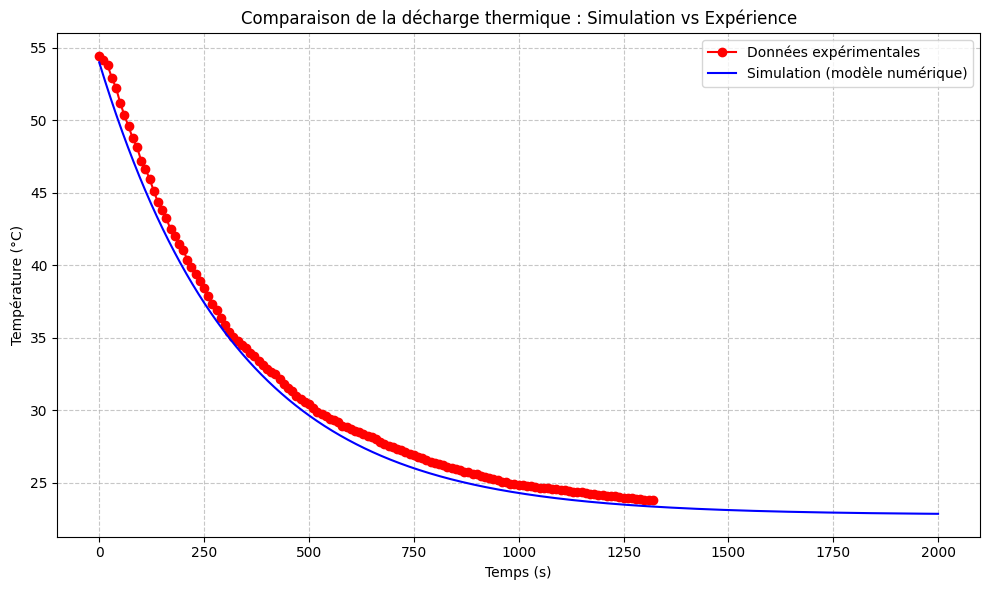

In [9]:
# --- Création du graphique ---
plt.figure(figsize=(10, 6))

# Courbe expérimentale
plt.plot(temps, temperatures, 'o-', label='Données expérimentales', color='red')

# Courbe simulée
plt.plot(t_values, T_values, label='Simulation (modèle numérique)', color='blue')

# Mise en forme du graphique
plt.title("Comparaison de la décharge thermique : Simulation vs Expérience")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Affichage du graphique
plt.show()

## Stratégie pour ajuster les coefficients
# Explications des Gains PID

Un système PID utilise trois paramètres principaux pour réguler le comportement du système : \(K_p\), \(K_i\), et \(K_d\).

---

### 1. \(K_p\) : Gain Proportionnel
- **Rôle** : Réagit immédiatement à l'erreur entre la valeur actuelle (ex. température) et la valeur cible.
- **Effet** : Plus \(K_p\) est élevé, plus le système réagit rapidement à une erreur. Cependant, un \(K_p\) trop grand peut provoquer des oscillations ou des dépassements.

#### Exemple :
Imaginez que votre système détecte que la température actuelle est de 30°C, mais la température cible est de 55°C. Le gain proportionnel amplifie cette erreur pour réagir rapidement.

**Résumé** : "Agit immédiatement pour corriger l'erreur actuelle."

---

### 2. \(K_i\) : Gain Intégral
- **Rôle** : Corrige les erreurs cumulées dans le temps pour éliminer l'erreur résiduelle (erreur statique).
- **Effet** : Plus \(K_i\) est élevé, plus le système compense rapidement les écarts persistants. Cependant, un \(K_i\) trop grand peut entraîner des oscillations et de l'instabilité.

#### Exemple :
Si votre système reste bloqué à 50°C au lieu de 55°C, \(K_i\) s'assure que cet écart est éliminé sur le long terme en augmentant progressivement la puissance.

**Résumé** : "Corrige les erreurs accumulées pour atteindre la cible parfaitement."

---

### 3. \(K_d\) : Gain Dérivé
- **Rôle** : Prévient les variations rapides en anticipant l'évolution de l'erreur (grâce à la dérivée de l'erreur).
- **Effet** : Plus \(K_d\) est élevé, plus le système devient stable en atténuant les oscillations. Cependant, un \(K_d\) trop grand peut ralentir la réponse.

#### Exemple :
Si la température actuelle se rapproche rapidement de 55°C, \(K_d\) limite la puissance pour éviter de dépasser ou d'osciller autour de la cible.

**Résumé** : "Anticipe et stabilise pour éviter des variations trop rapides."


Temps : 1.0s, Température : 23.29°C, Puissance : 15.00W
Temps : 2.0s, Température : 23.77°C, Puissance : 15.00W
Temps : 3.0s, Température : 24.26°C, Puissance : 15.00W
Temps : 4.0s, Température : 24.74°C, Puissance : 15.00W
Temps : 5.0s, Température : 25.22°C, Puissance : 15.00W
Temps : 6.0s, Température : 25.70°C, Puissance : 15.00W
Temps : 7.0s, Température : 26.18°C, Puissance : 15.00W
Temps : 8.0s, Température : 26.65°C, Puissance : 15.00W
Temps : 9.0s, Température : 27.13°C, Puissance : 15.00W
Temps : 10.0s, Température : 27.60°C, Puissance : 15.00W
Temps : 11.0s, Température : 28.07°C, Puissance : 15.00W
Temps : 12.0s, Température : 28.55°C, Puissance : 15.00W
Temps : 13.0s, Température : 29.01°C, Puissance : 15.00W
Temps : 14.0s, Température : 29.48°C, Puissance : 15.00W
Temps : 15.0s, Température : 29.95°C, Puissance : 15.00W
Temps : 16.0s, Température : 30.41°C, Puissance : 15.00W
Temps : 17.0s, Température : 30.88°C, Puissance : 15.00W
Temps : 18.0s, Température : 31.34°C, Pu

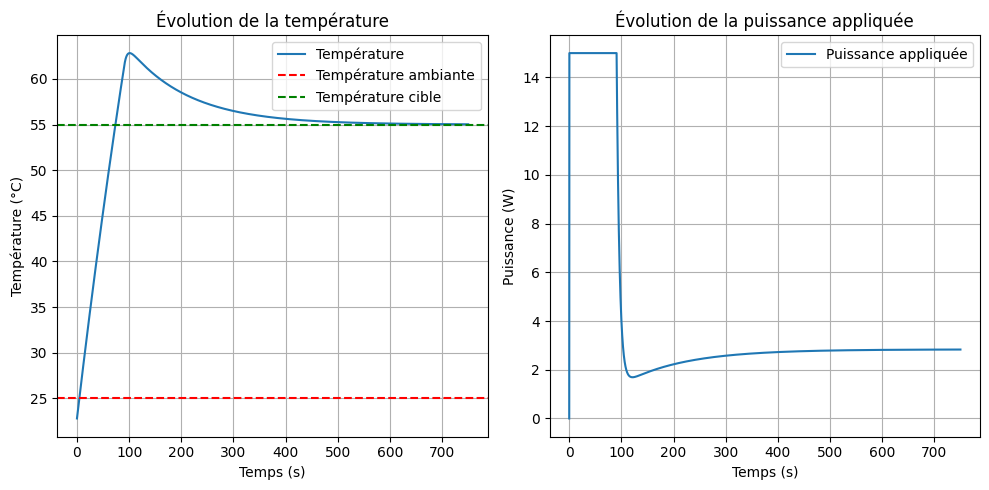

In [11]:
# Constantes du problème
tau = 330.1717276356472  # Constante de temps en secondes
alpha = 0.0944931164     # Coefficient de dissipation thermique en W/K
C = tau * alpha          # Capacité thermique en J/K
Tamb = 25                # Température ambiante en °C
T_cible = 55             # Température cible pour le contrôle en °C

# Gains PID
# Kp = 4.0                 # Gain proportionnel
# Ki = 0.005               # Gain intégral
# Kd = 3.0                 # Gain dérivé

Kp = 6.0   # Gain proportionnel augmenté
Ki = 0.05  # Gain intégral augmenté
Kd = 1.5   # Gain dérivé réduit

# Méthode d'Euler pour la simulation de la température et de la puissance appliquée
def euler_method(T0, Papp0, t_final, dt):
    integral_error = 0   # Initialisation de l'intégrale de l'erreur
    previous_error = 0   # Initialisation de l'erreur précédente

    # Vecteurs de temps, température et puissance
    t_values = np.arange(0, t_final, dt)
    T_values = np.zeros_like(t_values)
    Papp_values = np.zeros_like(t_values)

    # Conditions initiales
    T_values[0] = T0
    Papp_values[0] = Papp0

    # Boucle de simulation
    for n in range(1, len(t_values)):
        T = T_values[n - 1]
        
        # Calcul de l'erreur, intégrale et dérivée pour le PID
        error = T_cible - T
        integral_error += error * dt
        derivative_error = (error - previous_error) / dt
        previous_error = error

        # Mise à jour de la puissance appliquée avec le PID
        Papp_values[n] = Kp * error + Ki * integral_error + Kd * derivative_error
        
        # Limitation de la puissance à 15 W
        Papp_values[n] = max(0, min(Papp_values[n], 15))

        # Mise à jour de la température par la méthode d'Euler
        T_values[n] = T + dt * (Papp_values[n] - alpha * (T - Tamb)) / C

        # Affichage conditionnel (toutes les 1 secondes)
        if n % int(1 / dt) == 0:  
            print(f"Temps : {n*dt}s, Température : {T_values[n]:.2f}°C, Puissance : {Papp_values[n]:.2f}W")

    return t_values, T_values, Papp_values

# Paramètres de simulation
T0 = 22.8      # Température initiale en °C
Papp0 = 0      # Puissance initiale en W
t_final = 750   # Temps final de la simulation en secondes
dt = 0.1       # Pas de temps en secondes

# Résolution de l'équation
t_values, T_values, Papp_values = euler_method(T0, Papp0, t_final, dt)

# Affichage des résultats
plt.figure(figsize=(10, 5))

# Graphique de l'évolution de la température
plt.subplot(1, 2, 1)
plt.plot(t_values, T_values, label="Température")
plt.axhline(Tamb, color='r', linestyle='--', label="Température ambiante")
plt.axhline(T_cible, color='g', linestyle='--', label="Température cible")
plt.xlabel("Temps (s)")
plt.ylabel("Température (°C)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la température")

# Graphique de l'évolution de la puissance appliquée
plt.subplot(1, 2, 2)
plt.plot(t_values, Papp_values, label="Puissance appliquée")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (W)")
plt.legend()
plt.grid(True)
plt.title("Évolution de la puissance appliquée")

plt.tight_layout()
plt.show()


In [12]:
# Fonction de simulation
def m_euler_method(T0, Papp0, P_max, t_final, dt, Kp, Ki, Kd):
        integral_error = 0   # Initialisation de l'intégrale de l'erreur
        previous_error = 0   # Initialisation de l'erreur précédente

        # Vecteurs de temps, température et puissance
        t_values = np.arange(0, t_final, dt)
        T_values = np.zeros_like(t_values)
        Papp_values = np.zeros_like(t_values)

        # Conditions initiales
        T_values[0] = T0
        Papp_values[0] = Papp0

        # Boucle de simulation
        for n in range(1, len(t_values)):
            T = T_values[n - 1]
            
            # Calcul de l'erreur, intégrale et dérivée pour le PID
            error = T_cible - T
            integral_error += error * dt
            derivative_error = (error - previous_error) / dt
            previous_error = error

            # Mise à jour de la puissance appliquée avec le PID
            Papp_values[n] = Kp * error + Ki * integral_error + Kd * derivative_error
            
            # Limitation de la puissance à P_max
            Papp_values[n] = max(0, min(Papp_values[n], P_max))

            # Mise à jour de la température par la méthode d'Euler
            T_values[n] = T + dt * (Papp_values[n] - alpha * (T - Tamb)) / C

        return t_values, T_values, Papp_values

# Fonction d'affichage interactif avec sliders supplémentaires
def plot_pid(Kp, Ki, Kd, t_final, T_cible, Tamb, P_max):
    # Paramètres de simulation
    T0 = Tamb      # Température initiale en °C
    Papp0 = 0      # Puissance initiale en W
    dt = 0.5       # Pas de temps en secondes

    # Mise à jour des constantes globales
    global alpha, C
    alpha = 0.0944931164   # Coefficient de dissipation thermique en W/K
    tau = 330.1717276356472  # Constante de temps en secondes
    C = tau * alpha          # Capacité thermique en J/K

    

    # Résolution de l'équation
    t_values, T_values, Papp_values = m_euler_method(T0, Papp0, P_max, t_final, dt, Kp, Ki, Kd)

    # Affichage des résultats
    plt.figure(figsize=(12, 6))

    # Graphique de l'évolution de la température
    plt.subplot(1, 2, 1)
    plt.plot(t_values, T_values, label="Température")
    plt.axhline(Tamb, color='r', linestyle='--', label="Température ambiante")
    plt.axhline(T_cible, color='g', linestyle='--', label="Température cible")
    plt.xlabel("Temps (s)")
    plt.ylabel("Température (°C)")
    plt.legend()
    plt.grid(True)
    plt.title("Évolution de la température")

    # Graphique de l'évolution de la puissance appliquée
    plt.subplot(1, 2, 2)
    plt.plot(t_values, Papp_values, label="Puissance appliquée")
    plt.xlabel("Temps (s)")
    plt.ylabel("Puissance (W)")
    plt.legend()
    plt.grid(True)
    plt.title("Évolution de la puissance appliquée")

    plt.tight_layout()
    plt.show()


# Création des sliders interactifs
interact(plot_pid,
         Kp=FloatSlider(value=6.0, min=0.0, max=10.0, step=0.1, description="Kp"),
         Ki=FloatSlider(value=0.05, min=0.0, max=0.1, step=0.001, description="Ki"),
         Kd=FloatSlider(value=1.5, min=0.0, max=10.0, step=0.1, description="Kd"),
         t_final=FloatSlider(value=750, min=10, max=1000, step=10, description="Temps max"),
         T_cible=FloatSlider(value=55, min=30, max=100, step=1, description="T cible (°C)"),
         Tamb=FloatSlider(value=25, min=10, max=40, step=1, description="T ambiant (°C)"),
         P_max=FloatSlider(value=15, min=5, max=50, step=1, description="P max (W)"));


interactive(children=(FloatSlider(value=6.0, description='Kp', max=10.0), FloatSlider(value=0.05, description=…